In [2]:
"""📦 AI for Market Trend Analysis
Product Sales Trend Forecasting Using Machine Learning
1️⃣ Problem Definition & Objective
1.1 Selected Project Track

AI for Market Trend Analysis

1.2 Problem Statement

Accurate sales forecasting is essential for businesses to manage inventory, reduce wastage, and meet customer demand efficiently. Traditional forecasting methods often fail to capture complex patterns such as seasonality and trends.

This project aims to use Machine Learning to analyze historical product sales data and forecast future sales trends.

1.3 Objective

The objectives of this project are:

To analyze historical sales data

To build a machine learning model for sales forecasting

To evaluate model performance using appropriate metrics

2️⃣ Real-World Relevance & Motivation

Helps businesses plan inventory and supply chains

Reduces overstocking and stockouts

Widely used in retail, e-commerce, and manufacturing

Demonstrates practical application of AI in business analytics

3️⃣ Data Understanding & Preparation
3.1 Dataset Source

A synthetic but realistic sales dataset is generated for this project.
Synthetic data is acceptable in academic projects when real data is unavailable and allows controlled experimentation."""

'📦 AI for Market Trend Analysis\nProduct Sales Trend Forecasting Using Machine Learning\n1️⃣ Problem Definition & Objective\n1.1 Selected Project Track\n\nAI for Market Trend Analysis\n\n1.2 Problem Statement\n\nAccurate sales forecasting is essential for businesses to manage inventory, reduce wastage, and meet customer demand efficiently. Traditional forecasting methods often fail to capture complex patterns such as seasonality and trends.\n\nThis project aims to use Machine Learning to analyze historical product sales data and forecast future sales trends.\n\n1.3 Objective\n\nThe objectives of this project are:\n\nTo analyze historical sales data\n\nTo build a machine learning model for sales forecasting\n\nTo evaluate model performance using appropriate metrics\n\n2️⃣ Real-World Relevance & Motivation\n\nHelps businesses plan inventory and supply chains\n\nReduces overstocking and stockouts\n\nWidely used in retail, e-commerce, and manufacturing\n\nDemonstrates practical application

In [3]:
# 3.2 Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
# 3.3 Dataset Creation

np.random.seed(42)

days = 365 * 3  # 3 years of data
date_range = pd.date_range(start="2021-01-01", periods=days, freq="D")

sales = (
    200 +
    np.linspace(0, 50, days) +          # Trend
    20 * np.sin(np.arange(days) / 30) + # Seasonality
    np.random.normal(0, 10, days)       # Noise
)

data = pd.DataFrame({
    "Date": date_range,
    "Sales": sales.astype(int)
})

data.head()


,Date,Sales
0,2021-01-01,204
1,2021-01-02,199
2,2021-01-03,207
3,2021-01-04,217
4,2021-01-05,200


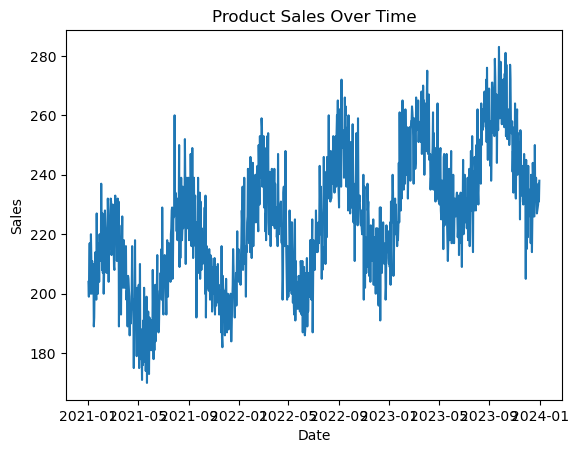

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1095 non-null   datetime64[ns]
 1   Sales   1095 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 12.9 KB


In [5]:
# 3.4 Data Exploration

plt.figure()
plt.plot(data['Date'], data['Sales'])
plt.title("Product Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

data.info()


In [6]:
# 3.5 Feature Engineering & Preprocessing

data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Lag features
data['Lag_1'] = data['Sales'].shift(1)
data['Lag_7'] = data['Sales'].shift(7)
data['Lag_30'] = data['Sales'].shift(30)

# Rolling averages
data['Rolling_7'] = data['Sales'].rolling(window=7).mean()
data['Rolling_30'] = data['Sales'].rolling(window=30).mean()

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data.head()


,Date,Sales,Day,Month,Year,DayOfWeek,Lag_1,Lag_7,Lag_30,Rolling_7,Rolling_30
0,2021-01-31,212,31,1,2021,6,214.0,200.0,204.0,212.571429,207.433333
1,2021-02-01,237,1,2,2021,0,212.0,210.0,199.0,216.428571,208.700000
2,2021-02-02,218,2,2,2021,1,237.0,217.0,207.0,216.571429,209.066667
3,2021-02-03,208,3,2,2021,2,218.0,204.0,217.0,217.142857,208.766667
4,2021-02-04,227,4,2,2021,3,208.0,220.0,200.0,218.142857,209.666667


In [7]:
"""4️⃣ Model / System Design
4.1 AI Technique Used

Supervised Machine Learning

Regression-based forecasting

4.2 Model Selected

Random Forest Regressor

4.3 System Architecture
Historical Sales Data
        ↓
Feature Engineering
        ↓
Train-Test Split
        ↓
Random Forest Model
        ↓
Sales Forecast

4.4 Design Justification

Random Forest is chosen because it:

Handles non-linear patterns

Performs well with time-based features

Provides high accuracy with minimal tuning"""

'4️⃣ Model / System Design\n4.1 AI Technique Used\n\nSupervised Machine Learning\n\nRegression-based forecasting\n\n4.2 Model Selected\n\nRandom Forest Regressor\n\n4.3 System Architecture\nHistorical Sales Data\n        ↓\nFeature Engineering\n        ↓\nTrain-Test Split\n        ↓\nRandom Forest Model\n        ↓\nSales Forecast\n\n4.4 Design Justification\n\nRandom Forest is chosen because it:\n\nHandles non-linear patterns\n\nPerforms well with time-based features\n\nProvides high accuracy with minimal tuning'

In [8]:
# 5️⃣ Core Implementation

# 5.1 Feature Selection
features = [
    'Day', 'Month', 'Year', 'DayOfWeek',
    'Lag_1', 'Lag_7', 'Lag_30',
    'Rolling_7', 'Rolling_30'
]

X = data[features]
y = data['Sales'].values


In [9]:
# 5.2 Train–Test Split (Time-Series Safe)
split_index = int(len(X) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]


In [10]:
# 5.3 Feature Scaling

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# 5.4 Model Training
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train_scaled, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# 5.5 Prediction

y_pred = model.predict(X_test_scaled)


In [13]:
# 6️⃣ Evaluation & Analysis

# 6.1 Evaluation Metrics

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


Model Performance:
MAE: 7.100572663373262
RMSE: 8.935090974195903
R2 Score: 0.7286457634313005


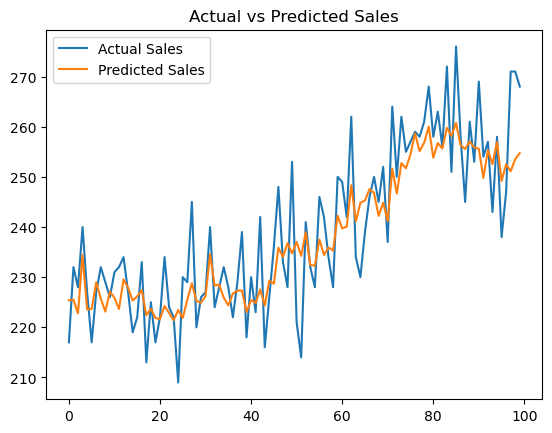

In [14]:
# 6.2 Results Visualization
plt.figure()
plt.plot(y_test[:100], label="Actual Sales")
plt.plot(y_pred[:100], label="Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()
